In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/ncr_ride_bookings.csv')
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
print(df['Booking Status'].unique())

['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']


In [6]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(150000, 21)

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

In [11]:
df = df.drop(columns=['Date', 'Time'])

In [12]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Numerical columns: fill NaNs with column means
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Categorical columns: fill NaNs with 'Unknown'
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

display(df)

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month,Day,Hour,Minute
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,1.0,Unknown,...,508.295912,24.637012,4.230992,4.404584,Unknown,2024,3,23,12,29
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,1.0,Unknown,...,237.000000,5.730000,4.230992,4.404584,UPI,2024,11,29,18,1
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,1.0,Unknown,...,627.000000,13.580000,4.900000,4.900000,Debit Card,2024,8,23,8,56
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,1.0,Unknown,...,416.000000,34.020000,4.600000,5.000000,UPI,2024,10,21,17,17
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,1.0,Unknown,...,737.000000,48.210000,4.100000,4.300000,UPI,2024,9,16,22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.200000,44.400000,1.0,Unknown,...,475.000000,40.080000,3.700000,4.100000,Uber Wallet,2024,11,11,19,34
149996,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.100000,30.800000,1.0,Unknown,...,1093.000000,21.310000,4.800000,5.000000,UPI,2024,11,24,15,55
149997,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.700000,23.400000,1.0,Unknown,...,852.000000,15.930000,3.900000,4.400000,Cash,2024,9,18,10,55
149998,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.900000,39.600000,1.0,Unknown,...,333.000000,45.540000,4.100000,3.700000,UPI,2024,10,5,7,53


#Data Visualization

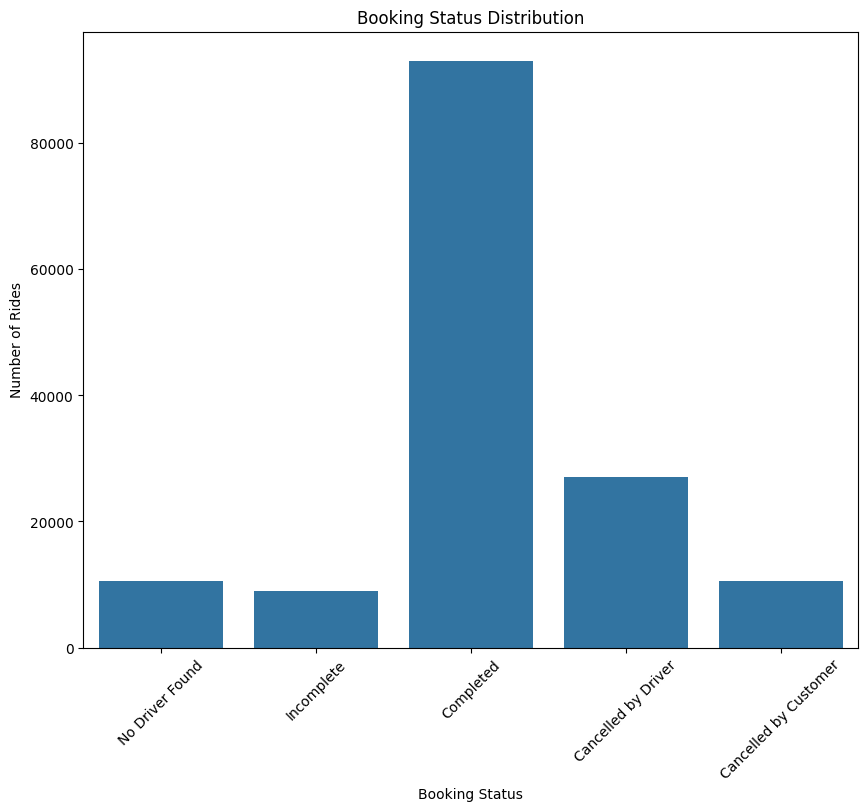

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='Booking Status', data=df)
plt.title("Booking Status Distribution")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4053495012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index, palette='coolwarm')


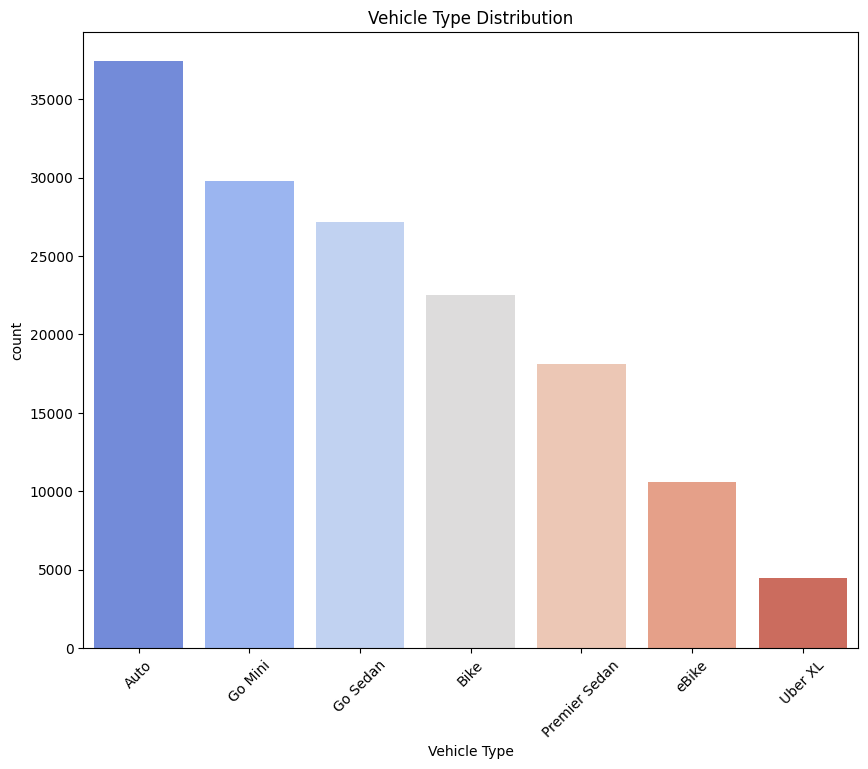

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.show()

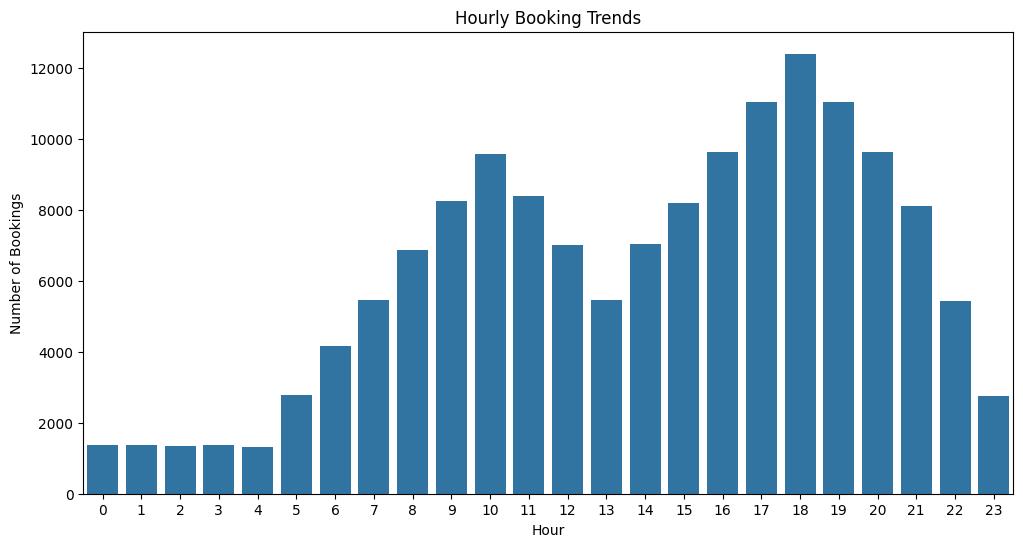

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Hourly Booking Trends')
plt.ylabel('Number of Bookings')
plt.show()

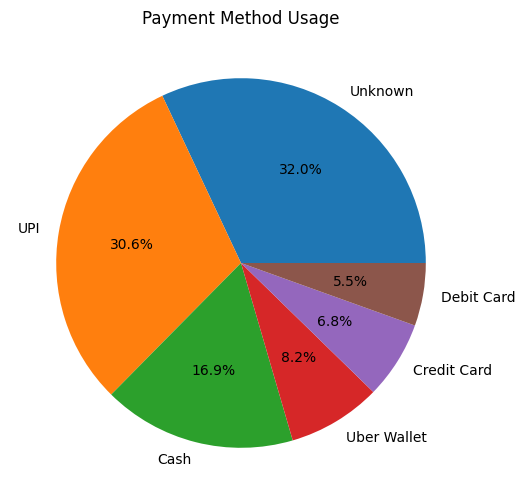

In [16]:
plt.figure(figsize=(10, 6))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Usage')
plt.ylabel('')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders={}
categorical_cols=df.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    df[col]=df[col].astype(str)
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [18]:
df

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month,Day,Hour,Minute
0,80398,4,16198,6,116,68,8.456352,29.149636,1.0,4,...,508.295912,24.637012,4.230992,4.404584,5,2024,3,23,12,29
1,5340,3,59522,3,149,47,4.900000,14.000000,1.0,4,...,237.000000,5.730000,4.230992,4.404584,3,2024,11,29,18,1
2,123807,2,135726,0,80,90,13.400000,25.800000,1.0,4,...,627.000000,13.580000,4.900000,4.900000,2,2024,8,23,8,56
3,130594,2,26449,4,21,60,13.100000,28.500000,1.0,4,...,416.000000,34.020000,4.600000,5.000000,3,2024,10,21,17,17
4,15756,2,147677,1,39,79,5.300000,19.600000,1.0,4,...,737.000000,48.210000,4.100000,4.300000,3,2024,9,16,22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,90677,2,55079,2,87,38,10.200000,44.400000,1.0,4,...,475.000000,40.080000,3.700000,4.100000,4,2024,11,11,19,34
149996,24220,2,21809,2,40,2,5.100000,30.800000,1.0,4,...,1093.000000,21.310000,4.800000,5.000000,3,2024,11,24,15,55
149997,88312,2,147560,3,146,69,2.700000,23.400000,1.0,4,...,852.000000,15.930000,3.900000,4.400000,0,2024,9,18,10,55
149998,33362,2,139126,0,37,140,6.900000,39.600000,1.0,4,...,333.000000,45.540000,4.100000,3.700000,3,2024,10,5,7,53


In [19]:
df=df.drop(columns=['Booking ID','Customer ID'])

In [20]:
df.columns

Index(['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

<Axes: >

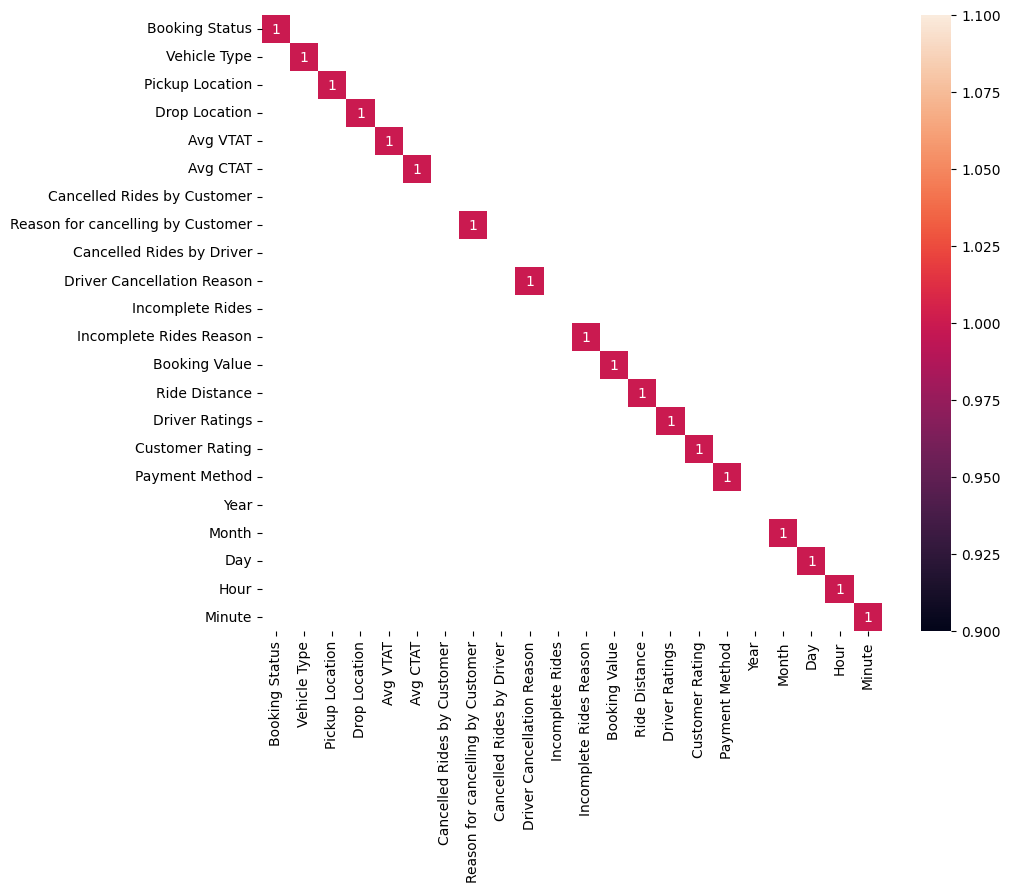

In [21]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True , mask=correlation <.65)

In [22]:
df.drop(columns=['Driver Cancellation Reason','Reason for cancelling by Customer','Incomplete Rides Reason'],axis=1,inplace=True)

In [23]:
df

,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month,Day,Hour,Minute
0,4,6,116,68,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,5,2024,3,23,12,29
1,3,3,149,47,4.900000,14.000000,1.0,1.0,1.0,237.000000,5.730000,4.230992,4.404584,3,2024,11,29,18,1
2,2,0,80,90,13.400000,25.800000,1.0,1.0,1.0,627.000000,13.580000,4.900000,4.900000,2,2024,8,23,8,56
3,2,4,21,60,13.100000,28.500000,1.0,1.0,1.0,416.000000,34.020000,4.600000,5.000000,3,2024,10,21,17,17
4,2,1,39,79,5.300000,19.600000,1.0,1.0,1.0,737.000000,48.210000,4.100000,4.300000,3,2024,9,16,22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2,87,38,10.200000,44.400000,1.0,1.0,1.0,475.000000,40.080000,3.700000,4.100000,4,2024,11,11,19,34
149996,2,2,40,2,5.100000,30.800000,1.0,1.0,1.0,1093.000000,21.310000,4.800000,5.000000,3,2024,11,24,15,55
149997,2,3,146,69,2.700000,23.400000,1.0,1.0,1.0,852.000000,15.930000,3.900000,4.400000,0,2024,9,18,10,55
149998,2,0,37,140,6.900000,39.600000,1.0,1.0,1.0,333.000000,45.540000,4.100000,3.700000,3,2024,10,5,7,53


In [24]:
df['Booking Status'].value_counts()

,count
Booking Status,
2,93000
1,27000
4,10500
0,10500
3,9000


In [25]:
x=df.drop('Booking Status',axis=1)
y=df['Booking Status']

#Features Selection

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Get feature names after dropping the target variable but before scaling
feature_names = df.drop('Booking Status', axis=1).columns

k = 19
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(x, y)
scores = selector.scores_

# Use feature_names to get the selected feature names
selected_features = feature_names[selector.get_support()]
feature_scores = pd.DataFrame({"Feature": feature_names, "Score": scores})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

print("Best Features Selected:")
print(selected_features)
print("\nOrdered Best Features:")
print(feature_scores)

Best Features Selected:
Index(['Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver',
       'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings',
       'Customer Rating', 'Payment Method', 'Year', 'Month', 'Day', 'Hour',
       'Minute'],
      dtype='object')

Ordered Best Features:
                        Feature         Score
12               Payment Method  5.024747e+04
3                      Avg VTAT  5.431368e+03
4                      Avg CTAT  4.266241e+03
9                 Ride Distance  4.073397e+03
17                       Minute  1.902053e+00
2                 Drop Location  1.026113e+00
16                         Hour  8.052047e-01
1               Pickup Location  5.646523e-01
15                          Day  5.260983e-01
0                  Vehicle Type  5.205537e-01
14                        Month  3.089183e-01
8                 Booking Value  3.426307e-02
11       

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=19 is greater than n_features=18. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 5  6  7 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)
print("Value counts of y_train after SMOTE:\n", y_train_resampled.value_counts())

Shape of X_train after SMOTE: (371790, 18)
Shape of y_train after SMOTE: (371790,)
Value counts of y_train after SMOTE:
 Booking Status
2    74358
3    74358
1    74358
0    74358
4    74358
Name: count, dtype: int64


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree'),
    "XGBoost": GradientBoostingClassifier()
}

In [31]:
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    results[name] = {'Train Accuracy (%)': round(train_acc, 2), 'Test Accuracy (%)': round(test_acc, 2)}
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_test_pred))
    conf = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} Confusion Matrix:")
    print(conf)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      2077
           1       0.88      0.55      0.68      5431
           2       0.99      0.85      0.91     18642
           3       0.36      0.89      0.51      1752
           4       0.58      1.00      0.73      2098

    accuracy                           0.80     30000
   macro avg       0.67      0.79      0.69     30000
weighted avg       0.87      0.80      0.81     30000


Logistic Regression Confusion Matrix:
[[ 1390   411     0     0   276]
 [ 1154  3013     0     0  1264]
 [    0     0 15821  2821     0]
 [    0     0   196  1556     0]
 [    0     5     0     0  2093]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      2077
           1       0.86      0.81      0.83      5431
           2       1.00      1.00      1.00     18642
       

In [32]:
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance:")
print(results_df)


Model Performance:
                     Train Accuracy (%)  Test Accuracy (%)
Logistic Regression               79.25              79.58
Decision Tree                    100.00              94.09
Random Forest                    100.00              96.45
Naive Bayes                       94.18              94.35
SVM                               75.88              76.19
KNN                               92.96              79.20
XGBoost                           96.67              96.73


In [33]:
#Potential overfitting (high training accuracy, low test accuracy)
#Potential underfitting (low training and test accuracy)